In [1]:
import tensorflow as tf 

In [2]:
from tensorflow.keras.datasets import mnist 
(X_train , y_train) , (X_test, y_test) = mnist.load_data()

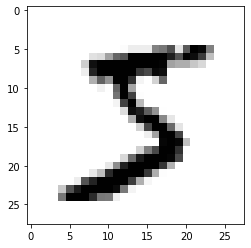

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [5]:
#change the way the label is represented
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [6]:
#test to see if the encoding worked
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [9]:
#convert the samples from (28*28) arrays to (784,1)vectors
import numpy as np 
x_train_reshp=np.reshape(X_train, (60000,784))
x_test_reshp=np.reshape(X_test, (10000,784))

In [18]:
print(set(x_train_reshp[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [10]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.MinMaxScaler()

In [16]:
# Normalize the data
x_train_norm = scaler.fit_transform(x_train_reshp)
x_test_norm = scaler.fit_transform(x_test_reshp)

In [17]:
print(set(x_train_norm[0]))

{0.0, 0.49411764705882355, 0.6862745098039216, 1.0, 0.4980392156862745, 0.9921568627450981, 0.06274509803921569, 0.580392156862745, 0.5098039215686274, 0.611764705882353, 0.00392156862745098, 0.21568627450980393, 0.07058823529411765, 0.25098039215686274, 0.00784313725490196, 0.2588235294117647, 0.32156862745098036, 0.3137254901960784, 0.3058823529411765, 0.011764705882352941, 0.3686274509803922, 0.44705882352941173, 0.1411764705882353, 0.13725490196078433, 0.5176470588235293, 0.5215686274509804, 0.5294117647058824, 0.6274509803921569, 0.6705882352941176, 0.6745098039215687, 0.7333333333333333, 0.7176470588235294, 0.7450980392156863, 0.788235294117647, 0.8313725490196078, 0.8588235294117647, 0.8352941176470589, 0.09019607843137255, 0.8862745098039215, 0.8980392156862745, 0.9490196078431372, 0.9333333333333333, 0.9411764705882353, 0.9568627450980391, 0.9764705882352941, 0.984313725490196, 0.5333333333333333, 0.6509803921568628, 0.9686274509803922, 0.6666666666666666, 0.5450980392156862, 

# the model 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
model = Sequential([
    Dense(250, activation = 'relu', input_shape = (784,)),
    Dense(500, activation = 'relu'),
    Dropout(0.1),
    Dense(500, activation = 'relu'),
    Dropout(0.1),
    Dense(250, activation = 'relu'),
    Dropout(0.1),
    Dense(10, activation = 'softmax')
])

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               125500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)              

In [30]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 7
)

Epoch 1/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0042 - accuracy: 0.9745
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0036 - accuracy: 0.9782
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0036 - accuracy: 0.9786
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0033 - accuracy: 0.9804
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0032 - accuracy: 0.9808
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0029 - accuracy: 0.9831
Epoch 7/7
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0031 - accuracy: 0.9820


In [31]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9744
test set accuracy:  97.4399983882904


In [32]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


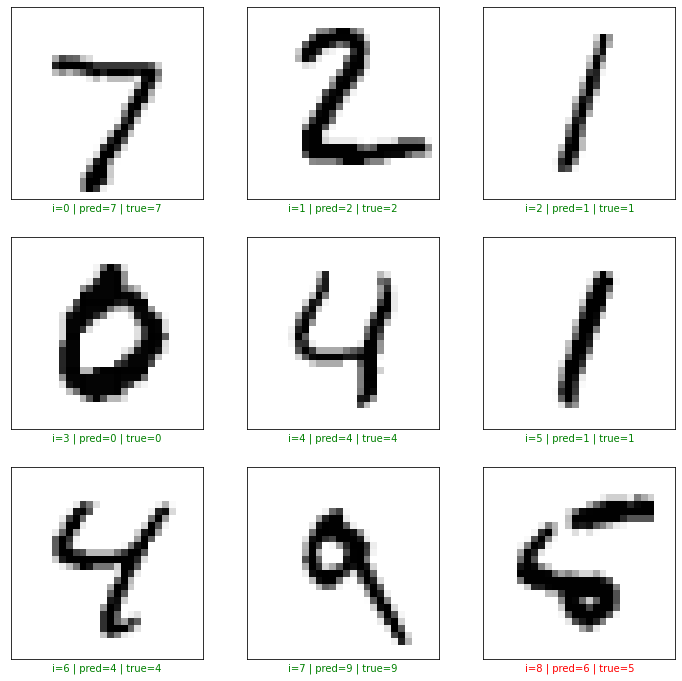

In [34]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(X_test[start_index + i], cmap='binary')
plt.show()